In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading csv file
df = pd.read_csv(r"C:\Users\Siddhant Sonawane\Downloads\LabTAT.csv")
pd.DataFrame(df)

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [13]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [14]:
#describe
df.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [15]:
#checking null values
df.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [16]:
#checking duplicates
df.duplicated().sum()

0

In [17]:
df.columns

Index(['Laboratory 1', 'Laboratory 2', 'Laboratory 3', 'Laboratory 4'], dtype='object')

In [18]:
#renaming columns
tat = df.rename({'Laboratory 1':'lab_1','Laboratory 2':'lab_2','Laboratory 3':'lab_3','Laboratory 4':'lab_4'},axis=1)
tat.head()

,lab_1,lab_2,lab_3,lab_4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


<AxesSubplot:xlabel='lab_1', ylabel='Count'>

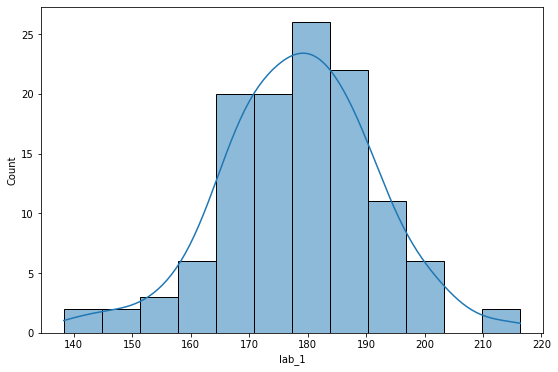

In [19]:
#data visualizing
#univariate analysis
plt.figure(figsize=(9,6))
sns.histplot(tat['lab_1'],kde=True)

The histogram of lab-1 showing bell shaped curve refers to normal curve with data points more concentrated towards the right-hand side of the distribution or the tail is elongated towards left side this makes the curve negatively skewed. lab-1's distribution also has outliers at 210.From the histogram we can see that the turn around time between 178-185 happens most frequently and there are time less than 165,for which tat happens less frequently.About outlier,the turn aroud time is rarely go beyond 210 and average turn around time is distributed between 165-190.

<AxesSubplot:xlabel='lab_2', ylabel='Count'>

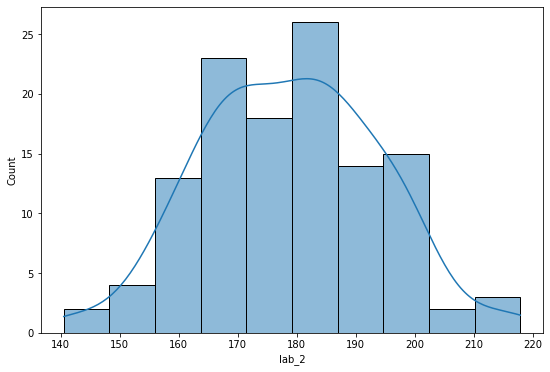

In [13]:
plt.figure(figsize=(9,6))
sns.histplot(tat['lab_2'],kde=True)

This histogram shows more bell shaped structure than lab-1 histogram.above histogram tell us that lab-2 data set lies between 140 to 220.the above curve is slightly skewed towards right side of the data.Normally the turn around time happens between 165-187 approximately and most frequently it happens approximately between 179-187.the lowest time taken for tat in lab-2 is aprroximately between 202-210.lab-2 rarely take time aprroximatley between 140-155 and 202-220.

<AxesSubplot:xlabel='lab_3', ylabel='Count'>

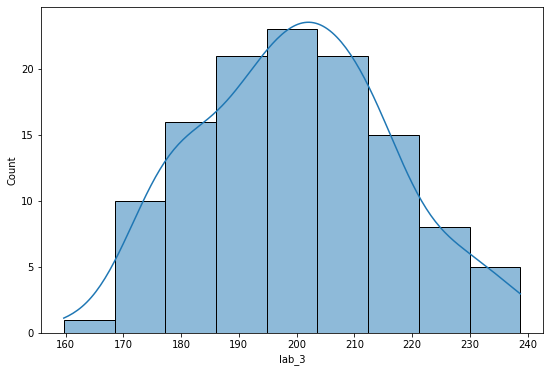

In [14]:
plt.figure(figsize=(9,6))
sns.histplot(tat['lab_3'],kde=True)

Histogram of data set of lab-3 is distributed between 160 to 240.In lab-3 most of the turn around time happens between 180-220.
there are less number of times for which lab-3 had taken time grater than 230 and also there are rare cases where lab-3 taken lowest time to complete tat which is less 170,therfore there is outlier present at left corner of curve.

<AxesSubplot:xlabel='lab_4', ylabel='Count'>

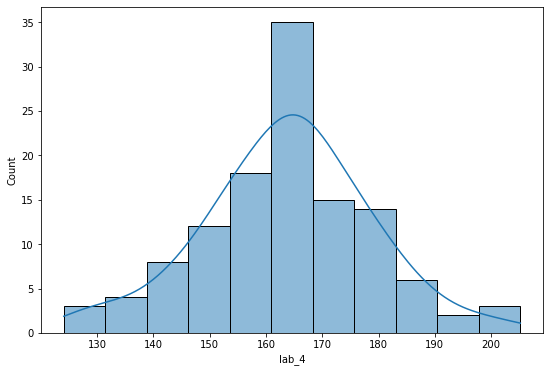

In [19]:
plt.figure(figsize=(9,6))
sns.histplot(tat['lab_4'],kde=True)

*The above curve represents distribution of tat for lab-4.Above curve has very steep peak (leptokurtic) implies most frequent time taken for tat in lab-4 is approximately between 160-170.The average time taken by lab-4 to complete tat is approximately between 150-180.The least time taken by lab-4 to complete tat is approximately between 190-198.

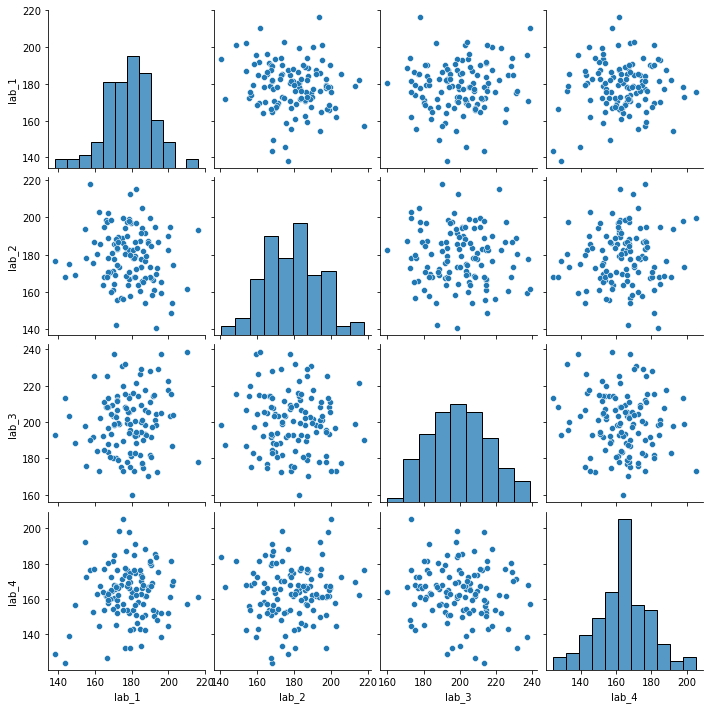

In [20]:
#mulivariate analysis
sns.pairplot(tat);

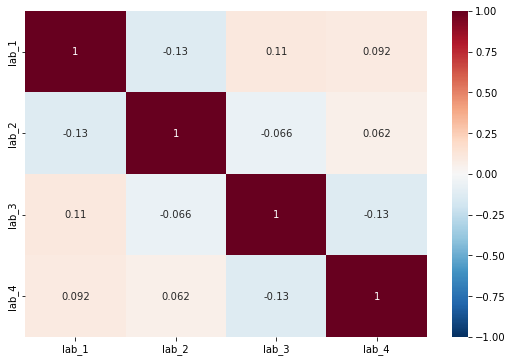

In [22]:
#To assure more about relation we are plotting correlation using heatmap
plt.figure(figsize=(9,6))
sns.heatmap(tat.corr(), cmap='RdBu_r',annot=True, vmin=-1, vmax=1);

*From the above pair-plot and heatmap it is clear that there is no relation between tat's of report of labs.

#Hypothesis
H0 = mu1 = mu2 = mu3 = mu4 (There is no difference in average TAT amoung the 4 laboratories)
H1 = mu1 != mu2 != mu3 != mu4 ( There is difference in average TAT amoung the 4 laboratories)

In [14]:
#importing necessary libarary
import scipy.stats as stats

# Using ANOVA to test hypothesis
stats.f_oneway(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],df.iloc[:,3])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

INFERENCE : As the p-value is smaller than alpha then we reject H0.
            Hence there is difference in the average TAT amoung the 4 laboratories.